# Networks and Neo4j

This chapter will go over the basics on how to connect to a neo4j database, query the database, and analyse data.  

Before you begin this lesson,

* Read though the Instalation Guide 
* Start you neo4j server (You should be able to over console in the browser.)
    


In [28]:
# Imports 
import sys

#from py2neo import authenticate, neo4j, Graph, Relationship
from py2neo import authenticate, Graph, Relationship
#from py2neo.cypher import CypherWriter
#from py2neo import cypher
# import cypher

#import MySQLdb
import pymysql
import numpy
import pprint
import pandas

import networkx
# Allows plots to be showed inline 
import matplotlib
%matplotlib inline

print "--COMPLETE--"


--COMPLETE--


### Connecting to the Neo4j Database 

To connect to the Neo4j Database we will be using the py2neo modual.

In the cell below we will begin by creating a connection via py2neo. 

In [27]:
# Set up connection to Ne04j local Database 
# You will need to authenticate your connection, use the next line as an example 
# authenticate("localhost:7474", "<YOUR USENAME HERE>, Default is: neo4j", "<YOUR_PASSWORD_HERE>")

database_host = "localhost"
database_port = "7474"
database_username = "neo4j"
database_password = "<PASSWORD>"

# set up authentication parameters
authenticate( database_host + ":" + database_port, database_username, database_password )

# Create a variable for our graph and print our connection infomation
graph_db = Graph()
print( graph_db )


<Graph uri=u'http://localhost:7474/db/data/'>


### Testing our connection
To extract data from our database, we can pass cypher commands to py2neo using the Graph object instance's `data()` command.

Run the cell below to tell py2neo to return a single node.

In [26]:
# The syntax below translates to,
#'Match (Find) any node, lets call it n, and show me its data. Limit the results to 1'

graph_db.data( "MATCH (n) RETURN n limit 1" )

[{u'n': (c11b024:Employee {employeeid:"90014540",position:"FACULTY"})}]

## Quick Review of Neo4j and Cypher 

When you think of data, you probably imagine an excel table where each row is an individual observation or data point. 
For example, 

|name | age | employee_id|
|-----|-----|------------|
|Joe  |  34 |   12345    |
|Ann  |  54 |   12346    |
    
In a graph database, that row is more like a ball. 


##### (node: Employee {name:Joe, age: 34, employee_id: 12345})

This ball is called a "node" in Neo4j. In fact, the little parentheses around Joe's information are designed to help the user think of Joe's information as a little ball. 

All the information about Joe is still there, but it's just not in a flat table format. Instead of storing each peice of Joe's information in a variable column, Joe's information is stored as **properties**, ie name, age, employee_id.
Joe's node also has a **label**, *Employee*, to identify this node as belonging to an employee.

Neo4j uses the Cypher Query Language to get information out of the Database. 

##### Components of a simple Cypher Query:
+ MATCH      
     - Essentially the same thing as SELECT in SQL 
+ (n)        
    - Any node (the n is just a variable, could be any letter) 
+ RETURN     
    - Needed in every query 
+ LIMIT      
    - Same as in SQL 

The following query will return 20 nodes from the database:  
##### graph_db.cypher.execute("MATCH (n) RETURN n LIMIT 20")

If I wanted to query just Award nodes, I would run this query;  
##### graph_db.cypher.execute("MATCH (n:Award) RETURN n LIMIT 20")


In [7]:
# You can use this cell to Test the Cypher Queries 
# The syntax below translates to, 
#'Match (Find) any nodes that are of type Award and show me the award number (award_num) data for each
# of the nodes returned. Limit the results to 20'
graph_db.data( "MATCH (n:Award) RETURN n.award_num LIMIT 20" )

[{u'n.award_num': u'aw1000'},
 {u'n.award_num': u'aw1001'},
 {u'n.award_num': u'aw1002'},
 {u'n.award_num': u'aw1003'},
 {u'n.award_num': u'aw1004'},
 {u'n.award_num': u'aw1005'},
 {u'n.award_num': u'aw1006'},
 {u'n.award_num': u'aw1007'},
 {u'n.award_num': u'aw1008'},
 {u'n.award_num': u'aw1009'},
 {u'n.award_num': u'aw1010'},
 {u'n.award_num': u'aw1011'},
 {u'n.award_num': u'aw1012'},
 {u'n.award_num': u'aw1013'},
 {u'n.award_num': u'aw1014'},
 {u'n.award_num': u'aw1015'},
 {u'n.award_num': u'aw1016'},
 {u'n.award_num': u'aw1017'},
 {u'n.award_num': u'aw1018'},
 {u'n.award_num': u'aw1019'}]

### Cypher Examples 

The below are some examples of different cypher commands executed using py2neo.

Note: The object returned by Py2neo is a neted list of dictonaries where each dictonary represents a single node.

In [8]:
# Collect 20 Employee Nodes 

# The syntax below translates to, 
#'Match(Find) any nodes of type Employee 
# then show me the employee ID (employeeid) of the employee nodes. Limit the results to 20'
node_query_single =  graph_db.data( "MATCH (e:Employee) RETURN e.employeeid LIMIT 20" )

pprint.pprint( node_query_single )

[{u'e.employeeid': u'90014540'},
 {u'e.employeeid': u'90026679'},
 {u'e.employeeid': u'90017693'},
 {u'e.employeeid': u'90028696'},
 {u'e.employeeid': u'90013819'},
 {u'e.employeeid': u'90001118'},
 {u'e.employeeid': u'90001300'},
 {u'e.employeeid': u'90023086'},
 {u'e.employeeid': u'90017074'},
 {u'e.employeeid': u'90025003'},
 {u'e.employeeid': u'90000321'},
 {u'e.employeeid': u'90001779'},
 {u'e.employeeid': u'90012327'},
 {u'e.employeeid': u'6663'},
 {u'e.employeeid': u'90028695'},
 {u'e.employeeid': u'90013011'},
 {u'e.employeeid': u'90004139'},
 {u'e.employeeid': u'90002533'},
 {u'e.employeeid': u'90022882'},
 {u'e.employeeid': u'90027179'}]


In [9]:
# Collect 20 Award Nodes and 20 employee Nodes 

# The syntax below translates to, 
#'Match (Find) any nodes that are of type Award and Match(Find) any nodes of type Employee 
# then show me the award number (award_num) of the award nodes 
# and the employee ID (employeeid) of the employee nodes. Limit the results to 20'
node_query_multiple =  graph_db.data("MATCH (a:Award), (e:Employee) RETURN a.award_num,e.employeeid LIMIT 20" )

pprint.pprint(node_query_multiple )

[{u'a.award_num': u'aw1000', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1001', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1002', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1003', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1004', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1005', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1006', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1007', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1008', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1009', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1010', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1011', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1012', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1013', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1014', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1015', u'e.employeeid': u'90014540'},
 {u'a.award_num': u'aw1016', u'e.employe

In [10]:
# Return 20 relationships where an Employee worked on an Award

# The syntax below translates to, 
#'Match (Find) any instances of a node of type Award connected to a node of type employee. 
# For each relationship found, return the award number and the employee id of the nodes in that relationship. 
# also return the relationship type, 'WORKED_ON'
#Limit the results to 20'
relationsip_query = graph_db.data("MATCH (a:Award) <-[r:WORKED_ON]- (e:Employee) RETURN a.award_num,e.employeeid,type(r) LIMIT 20")

pprint.pprint( relationsip_query )

[{u'a.award_num': u'aw1000',
  u'e.employeeid': u'90014540',
  u'type(r)': u'WORKED_ON'},
 {u'a.award_num': u'aw1001',
  u'e.employeeid': u'90026679',
  u'type(r)': u'WORKED_ON'},
 {u'a.award_num': u'aw1002',
  u'e.employeeid': u'90017693',
  u'type(r)': u'WORKED_ON'},
 {u'a.award_num': u'aw1003',
  u'e.employeeid': u'90028696',
  u'type(r)': u'WORKED_ON'},
 {u'a.award_num': u'aw1004',
  u'e.employeeid': u'90013819',
  u'type(r)': u'WORKED_ON'},
 {u'a.award_num': u'aw1005',
  u'e.employeeid': u'90001118',
  u'type(r)': u'WORKED_ON'},
 {u'a.award_num': u'aw1006',
  u'e.employeeid': u'90001300',
  u'type(r)': u'WORKED_ON'},
 {u'a.award_num': u'aw1145',
  u'e.employeeid': u'90023086',
  u'type(r)': u'WORKED_ON'},
 {u'a.award_num': u'aw1476',
  u'e.employeeid': u'90023086',
  u'type(r)': u'WORKED_ON'},
 {u'a.award_num': u'aw1007',
  u'e.employeeid': u'90023086',
  u'type(r)': u'WORKED_ON'},
 {u'a.award_num': u'aw1146',
  u'e.employeeid': u'90017074',
  u'type(r)': u'WORKED_ON'},
 {u'a.awar

In [11]:
# Pattern Query 

# Retrun 20 instances of the pattern where two employees worked on the same award. Return only the employeeid of each employee  

# The syntax below translates to, 
# 'Match (Find) any instances of two nodes of type employee having a relationship with a node of type award.
# Return the employeeid of each of the employee nodes in that relationship.
# Also, return the award number of the award in the relationship.  
# Limit the results to 20'
pattern_query = graph_db.data("MATCH (e1:Employee) --> (a:Award) <-- (e2:Employee) RETURN e1.employeeid, e2.employeeid, a.award_num LIMIT 20")

pprint.pprint( pattern_query )

[{u'a.award_num': u'aw1003',
  u'e1.employeeid': u'90000919',
  u'e2.employeeid': u'90028696'},
 {u'a.award_num': u'aw1004',
  u'e1.employeeid': u'90024693',
  u'e2.employeeid': u'90013819'},
 {u'a.award_num': u'aw1005',
  u'e1.employeeid': u'90001652',
  u'e2.employeeid': u'90001118'},
 {u'a.award_num': u'aw1006',
  u'e1.employeeid': u'90025754',
  u'e2.employeeid': u'90001300'},
 {u'a.award_num': u'aw1145',
  u'e1.employeeid': u'90029620',
  u'e2.employeeid': u'90023086'},
 {u'a.award_num': u'aw1007',
  u'e1.employeeid': u'90026898',
  u'e2.employeeid': u'90023086'},
 {u'a.award_num': u'aw1007',
  u'e1.employeeid': u'90004472',
  u'e2.employeeid': u'90023086'},
 {u'a.award_num': u'aw1007',
  u'e1.employeeid': u'90022371',
  u'e2.employeeid': u'90023086'},
 {u'a.award_num': u'aw1146',
  u'e1.employeeid': u'90026012',
  u'e2.employeeid': u'90017074'},
 {u'a.award_num': u'aw1008',
  u'e1.employeeid': u'90004472',
  u'e2.employeeid': u'90017074'},
 {u'a.award_num': u'aw1008',
  u'e1.empl

## Using Python to Automate Cypher Tasks 

An advantage of using python to interface with neo4j is that you can send commands to neo4j in a saved and reproducable manner. In theory, all the work we did copying and pasting commands into neo4j in the instalation chapter can be replaced with python commands.

To demonstrate this we will add some new Nodes and Relationships to our graph.

Roke College prides itself on providing research opportunities for its Students. Students are often employed by the university to provide research assistance to faculty members on the awards they work on. 

To fully add the Students to the database we will need to:
    1. Create a variable setting the location of our files. This is the directory
    where your student_data.csv and award_data.csv files are saved. 
    Example on Windows: data_directory_path = "C:\Users\<YOUR_USERNAME>\Documents\Neo4j\default.graphdb\import"
    2. Load in the student nodes via a csv file 
    3. Create a WORKED_ON relationship between the students and the awards on which they work
    4. Createa WORKED_WITH relationship between students and their peers who worked on the same awards 
    

_NOTE:_

_You may nottice that here we are using the MERGE command instead of the CREATE command to create relationships. This is done to prevent duplicate nodes and relationships from being created. A CREATE command will create a new node or relationship regardless of whether that entitiy already exsists. The MERGE command will create that node or relationship only if it does not already exist._


##### Load in Student Nodes

In [29]:
# Store data directory path for re-use
data_directory_path = ""


# The syntax below translates to, 
#'Load the file at the location <File Path>.
# For each row in that data, create a node of type Student with the properties employeeid and position
cypher_string = '''USING PERIODIC COMMIT
LOAD CSV WITH HEADERS FROM \"file://'''
cypher_string += data_directory_path
cypher_string += '''/student_data.csv\"
AS row CREATE (:Student {employeeid: row.employeeid, position: row.occupation_orig});'''

graph_db.data( cypher_string )
print "--COMPLETE--"

--COMPLETE--


##### Create Worked on Relationships with Awards 

In [30]:
# The syntax below translates to, 
#'Load the file at the location <File Path>.
# For each row in the file, find the Award node and Student node that corespond to the 
# arard_num and employeeid in that row.
# if there is not already a WORKED_ON relationship between the two, create one. 

cypher_string = '''USING PERIODIC COMMIT
LOAD CSV WITH HEADERS FROM \"file://'''
cypher_string += data_directory_path
cypher_string += '''/award_data.csv" AS row
MATCH (a:Award {award_num: row.uniqueawardnumber})
MATCH (s:Student {employeeid: row.employeeid})
MERGE (s)-[r:WORKED_ON]->(a);'''

graph_db.data( cypher_string )
print "--COMPLETE--"

--COMPLETE--


##### Create Worked With relationships between the students and existing staff 

In [14]:
# The syntax below translates to, 
# Find the instances where two nodes have a WORKED_ON relationship with an Award node,
# if there is not a 'WORKED_WITH' relationship between the two, create one. 
cypher_string = '''MATCH (n1)-[:WORKED_ON]->(a:Award)<-[:WORKED_ON]-(n2)
MERGE (n1)-[r:WORKED_WITH]-(n2);'''

graph_db.data( cypher_string )
print "--COMPLETE--"

[]

### If you would like to see the new data, open your neo4j console. you'll see that we now have a new node label, Student. 

# Networkx
### Plotting and Graph Analysis 

Networkx is a python modual for creating, displaying and analysing graph data. 

We can load data from our neo4j graph into networkx by preforming queries and passing that data to networkx.

Run the cell below to see an example

   a.award_num p.employeeid  weight
0       aw1000     90014540    0.01
1       aw1001     90026679    0.01
2       aw1002     90017693    0.01
3       aw1003     90000919    0.01
4       aw1003     90028696    0.01
5       aw1004     90024693    0.01
6       aw1004     90013819    0.01
7       aw1005     90001652    0.01
8       aw1005     90001118    0.01
9       aw1006     90039108    0.01
10      aw1006     90039108    0.01
11      aw1006     90025754    0.01
12      aw1006     90001300    0.01
13      aw1007     90026898    0.01
14      aw1007     90004472    0.01
15      aw1007     90022371    0.01
16      aw1007     90023086    0.01
17      aw1008     90004472    0.01
18      aw1008     90028781    0.01
19      aw1008     90024665    0.01
20      aw1008     90017074    0.01
21      aw1009     90028781    0.01
22      aw1009     98101941    0.01
23      aw1009     90002437    0.01
24      aw1009     90025003    0.01
25      aw1010     98101941    0.01
26      aw1010     90001461 

'\nNotes \nGreen Nodes are Employees\nYellow Nodes are Students\nRed Nodes are Awards\n\n'

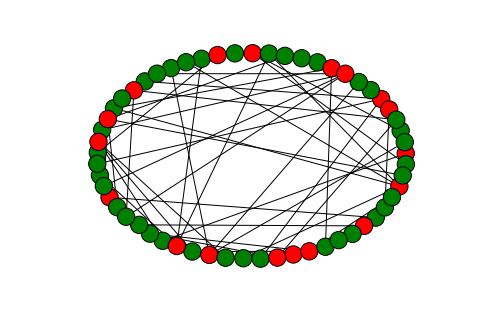

In [24]:
# Preform a cypher query to get 50 instances where a person worked on an award
results = graph_db.data("MATCH (p) -[r]-> (a:Award) RETURN p.employeeid, a.award_num LIMIT 50")

# Convert The results to a dataframe 
results_df =pandas.DataFrame(results)

# This will make  the connections between the nodes easier to see 
results_df['weight'] = .01

# Uncomment this next line if you would like to see what the data looks like 
print(pandas.DataFrame(results_df))

# Convert to graph object
graph = networkx.from_pandas_dataframe(results_df, 'p.employeeid', 'a.award_num', ['weight'])


# The following code is used to keep track of employees vs. award numbers,
# and then to assign colors to nodes of each type in the graph
emps = {}
awards = {} 
color_vals = []

for pair in results:
    emps[pair["p.employeeid"]] = 1
    awards[pair["a.award_num"]] = 1


for node in graph.nodes(data =True):
    if node[0] in emps:
        color_vals.append ('g')  # green
    else:
        color_vals.append ('r')  # red

    
# Draw the graph 
networkx.draw(graph, node_color = color_vals)

"""
Notes 
Green Nodes are Employees
Yellow Nodes are Students
Red Nodes are Awards

"""

## Network Analysis 
The networkx module also has built in tools to analyse graphs. The following measurements are used to assess how the nodes are related to each other in the graph database.  

### Network Measurments 
This is the vocabularly for studing a network 

 **Degree Centrality ** - counts the number of edges that a node has 
     - Nodes with a high degree of connections usually play an important role in a network 
 **Betweenness ** - indicator of a node's centality in a network. 
     - Equal to the number of shortest paths from all vertices to all others that pass through that node 
 **Diameter** - The longest shortest path over all pairs of nodes 
     - Often we want to find the shortest distance between two nodes; the diameter is the longest of these paths 
     - Nodes that occur on many shortest paths between other nodes in the graph have a high betweenness centrality score  
 **Cliques ** - A clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent.  
     
     
Let's look at how these measurements appear in a sample set of data.
  

#### Run the Cell Below to create one of Networkx eample graphs, the Maze Graph

Tuttle Graph
-------------
Number of Nodes: 8


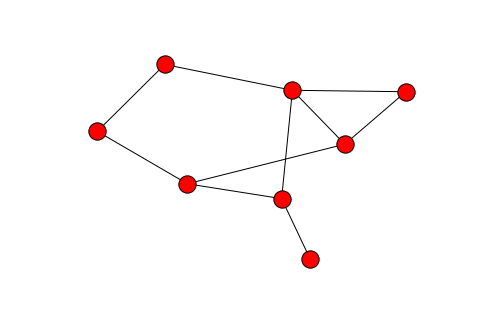

In [16]:
# Create The graph
maze=networkx.sedgewick_maze_graph()

# Draw the graph
networkx.draw(maze)

print( "Tuttle Graph" )
print( "-------------" )
print( "Number of Nodes: " + str( maze.number_of_nodes() ) )

### Degree and Centrality

- Counts the number of edges that a node has 
- Nodes with a high degree of connections usally play an important role in a network 

In [17]:
# Calculate the degree of each node 
maze_degree = maze.degree().values()

# Maxinum number of connections  
print( "The Maximum number of Edges is " + str( max(maze_degree) ) )

# Lowest Number of Connections 
print( "The Minimum number of Edges is " + str( min(maze_degree) ) )

# Average Number of Connections 
print( "The Average number of Edges is " + str( numpy.mean(maze_degree) ) )

# median number of connections 
print( "The Median number of Edges is " + str( numpy.median(maze_degree ) ) )

The Maximum number of Edges is 4
The Minimum number of Edges is 1
The Average number of Edges is 2.5
The Median number of Edges is 2.5


In [18]:
# Normalized degree is degree centrality divided by the maximum possible number of connections 
# The bigger the number, the more connections 

# Calulate  degree centrality for all the modes in the maze graph 
maze_degree_cen = networkx.degree_centrality(maze).values()

# Maxinum number of Normalized Degree Centrality   
print( "The Maximum Degree Centrality is " + str( max(maze_degree_cen) ) )

# Lowest Number of Normalized Degree Centrality  
print( "The Minimum Degree Centrality is " + str( min(maze_degree_cen) ) )

# Average Number of Normalized Degree Centrality  
print( "The Average Degree Centrality is " + str( numpy.mean(maze_degree_cen) ) )

# median number of Normalized Degree Centrality  
print( "The Median Degree Centrality is " + str( numpy.median(maze_degree_cen) ) )

The Maximum Degree Centrality is 0.571428571429
The Minimum Degree Centrality is 0.142857142857
The Average Degree Centrality is 0.357142857143
The Median Degree Centrality is 0.357142857143


In [19]:
# Freeman Centralization:
# How much variation is there in the centrality scores among the nodes?
# http://cs.brynmawr.edu/Courses/cs380/spring2013/section02/slides/05_Centrality.pdf
# Scores closer to one convey more popular nodes interact with many other nodes; 
# the closer to zero, the more interactions between nodes are evenly distributed 

# Calculate the centralization for all the nodes 
all_degrees = maze.degree().values()

# Get the Maximum degree number 
max_degree = max(all_degrees)
# Get the number of nodes in the maze graph
nodes_num = maze.number_of_nodes()

# Calculate the centrality using the max degree, the number of nodes, and the degrees of all then node
centrality = sum([max_degree - x for x in all_degrees]) / float(((nodes_num - 1)*(nodes_num - 2)))
print( "The Centrility of this graph is " + str( centrality ) )

The Centrility of this graph is 0.285714285714


### Betweenness
- Equal to the number of shortes paths from all vertices to all others that pass through that node 

In [20]:
# Calulate Betweenness Centrality scores for all the nodes
btw_cen = networkx.betweenness_centrality(maze).values()

print( "The Maximum Betweenness measure is " + str(max(btw_cen)))

print( "The Minimum Betweenness measure is " + str(min(btw_cen)))

print( "The Average Betweenness measure is " + str(numpy.mean(btw_cen)))

print( "The Median Betweenness measure is " + str(numpy.median(btw_cen)))

The Maximum Betweenness measure is 0.357142857143
The Minimum Betweenness measure is 0.0
The Average Betweenness measure is 0.136904761905
The Median Betweenness measure is 0.0833333333333


### Diameter
- Often we want to find the shortest distance between two nodes; the diameter is the longest of theses paths 
- Nodes that occur on many shortest paths between other nodes in the graph have a high betweenness centrality score  

In [21]:
diameter_size = networkx.diameter(maze)
print( "The Diameter of this graph is " + str(diameter_size) )


The Diameter of this graph is 3


### Cliques

- A clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent.  

In [22]:
maze_cliques =  list(networkx.find_cliques(maze))
print( "The Cliques in the Maze graph are, " + str(maze_cliques) )

The Cliques in the Maze graph are, [[0, 2], [0, 5], [0, 7], [1, 7], [2, 6], [4, 3, 5], [4, 6], [4, 7]]


##### The above list of cliques are a somewhat unintresting.
Run the code cell below to see the clique list of another built-in graph, the lolipop graph

You can see that the lollipop graph has a cluster of 10 nodes that make up the "candy" part of the lollipop while the "stem" of the lollipop is a line of nodes.

The Cliques in the Lollipop graph are, [[9, 0, 1, 2, 3, 8, 4, 5, 6, 7], [9, 10], [11, 10], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [16, 17], [17, 18], [18, 19], [19, 20], [20, 21], [21, 22], [22, 23], [23, 24], [24, 25], [25, 26], [26, 27], [27, 28], [28, 29]]


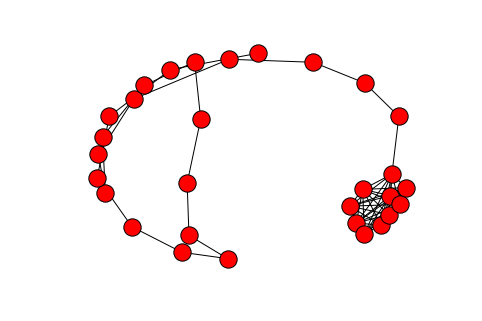

In [23]:
# Create the Graph 
lolli_g = lollipop=networkx.lollipop_graph(10,20)

# Get the cliques of the graph 
lolli_cliques = list(networkx.find_cliques(lolli_g))

print( "The Cliques in the Lollipop graph are, " + str(lolli_cliques) )

# Draw the Graph
networkx.draw(lolli_g)